## IT309 - SimplifiedLinkedBinaryTree - stand-alone class definition with traversals as external functions

### Note: This is an alternative to the more complex implementation code presented in the textbook.  That code relies on extensive use of inheritance.  Tree => BinaryTree => LinkedBinaryTree.


In [1]:
class SimplifiedLinkedBinaryTree():      # SLBT
  """Simplified linked representation of a binary tree structure - only the essentials included."""

  #-------------------------- nested Node class --------------------------
  class Node:
    """Lightweight, nonpublic class for storing a node."""
    def __init__(self, element, parent=None, left=None, right=None):
      self.element = element          # Data
      self.parent = parent            # reference pointer to parent node -'None' for root
      self.left = left                # reference pointer to left child or None
      self.right = right              # reference pointer to right child or None  

 
  #-------------------------- SLBT constructor --------------------------
  def __init__(self):
    """Create an initially empty binary tree."""
    self.root = None
    self.size = 0

  #-------------------------- accessors --------------------------
  def __len__(self):
    """Return the total number of elements in the tree."""
    return self.size
  
  def root(self):
    """Return the root Position of the tree (or None if tree is empty)."""
    return self.root

  def parent(self, p):
    """Return the Position of p's parent (or None if p is root)."""
    return p.parent

  def left(self, p):
    """Return the Position of p's left child (or None if no left child)."""
    return p.left

  def right(self, p):
    """Return the Position of p's right child (or None if no right child)."""
    return p.right

  def element(self, p):
    return p.element

  def is_root(self, p):
    if p.parent is None:
        return True
    return False

  def is_leaf (self, p):
    if p.left is None and p.right is None:
        return True
    return False

  def num_children(self, p):
    """Return the number of children of Position p."""
    count = 0
    if p.left is not None:     # left child exists
      count += 1
    if p.right is not None:    # right child exists
      count += 1
    return count

  def depth(self, p):
    """Return the number of levels separating Position p from the root."""
    if self.is_root(p):
      return 0
    else:
      return 1 + self.depth(p.parent)

  #-------------------------- mutators --------------------------
  def add_root(self, e):
    """Place element e at the root of an empty tree and return new Position.

    Raise ValueError if tree nonempty.
    """
    if self.root is not None:
      raise ValueError('Root exists')
    self.size = 1
    self.root = self.Node(e)
    return self.root

  def add_left(self, p, e):
    """Create a new left child for Position p, storing element e.

    Return the Position of new node.
    Raise ValueError if Position p is invalid or p already has a left child.
    """
    if p.left is not None:
      raise ValueError('Left child exists')
    self.size += 1
    p.left = self.Node(e, parent = p)            # p is the parent
    return p.left

  def add_right(self, p, e):
    """Create a new right child for Position p, storing element e.

    Return the Position of new node.
    Raise ValueError if Position p is invalid or p already has a right child.
    """
    if p.right is not None:
      raise ValueError('Right child exists')
    self.size += 1
    p.right = self.Node(e, parent = p)          # node is its parent
    return p.right

  def replace(self, p, e):
    """Replace the element at position p with e, and return old element."""
    old = p.element
    p.element = e
    return old

  

### Create a LinkedBinaryTree object, then assign it a root with node element = 10

In [2]:
SLBT = SimplifiedLinkedBinaryTree()
type(SLBT)

__main__.SimplifiedLinkedBinaryTree

In [3]:
root = SLBT.add_root(10)


In [4]:
id(SLBT.root)

1233801011496

In [5]:
print(SLBT.root.element)
print(SLBT.size)

10
1


### Add left and right children of the root, then additional children. Final tree = (10  (5 (2  8)) (15  ( 12  18))) 

In [6]:
SLBT.add_left(root, 5)
SLBT.add_right(root, 15)
print(len(SLBT))


3


In [7]:
print(SLBT.root.left.element)
print(SLBT.root.right.element)

5
15


### Populate the rest of the tree with additional lower level nodes...

In [8]:
L = SLBT.left(root)
R = SLBT.right(root)
LL = SLBT.add_left(L, 2)
LR = SLBT.add_right(L, 8)
LRL = SLBT.add_left(LR, 7)
RL = SLBT.add_left(R, 12)
RLR = SLBT.add_right(RL, 13)
RR = SLBT.add_right(R, 18)
print(len(SLBT))

9


The tree that was defined above looks like this (letters are the variable names representing nodes, 
                                                 numbers are the element or node data values):

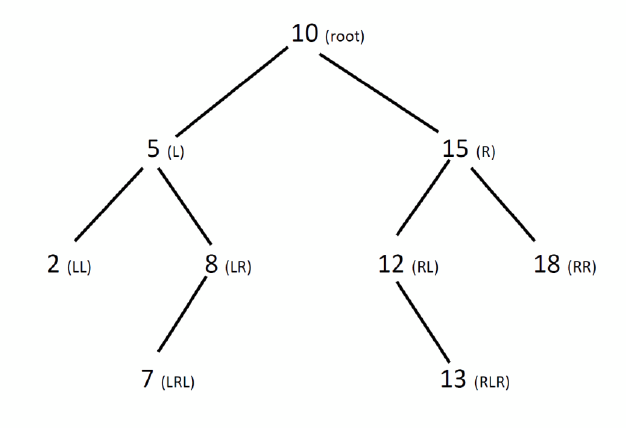

### Use the various methods to ask questions about node positions

In [9]:
print ('Is "root" the root? ', SLBT.is_root(root))
print ('Is "root" a leaf? ', SLBT.is_leaf(root))
print ('Is LL the root? ', SLBT.is_root(LL))
print ('Is LL a leaf? ', SLBT.is_leaf(LL))

Is "root" the root?  True
Is "root" a leaf?  False
Is LL the root?  False
Is LL a leaf?  True


In [10]:
print ('Depth at root = ', SLBT.depth(root))
print('Depth at L = ', SLBT.depth(L))
print('Depth at LL = ', SLBT.depth(LL))
print('Depth at RLR = ', SLBT.depth(RLR))

Depth at root =  0
Depth at L =  1
Depth at LL =  2
Depth at RLR =  3


In [11]:
print('Number of children of root: ', SLBT.num_children(root))
print('Number of children of "LL": ', SLBT.num_children(LL))

Number of children of root:  2
Number of children of "LL":  0


In [12]:
print(SLBT.root.left.left.element)

2


### View the tree nodes - their position in the tree and link values.  Follow the links from node to node...

In [13]:
TreeNodes = (root, L, R, LL, LR, LRL, RL, RLR, RR)
node_name = ('root', 'L', 'R', 'LL', 'LR', 'LRL', 'RL', 'RLR', 'RR')

x = 0    # use to insert node variable name into output
for n in TreeNodes:
    print ('n= {0:4d}, {1:4s}  id= {2:14d} left = {3:14d} right = {4:14d}'.format(n.element, node_name[x], id(n), id(n.left), id(n.right)))
    x += 1
    #print('The parent of node ', n.element(), ' is ', LBT.parent(n).element())

n=   10, root  id=  1233801011496 left =  1233801014520 right =  1233801014184
n=    5, L     id=  1233801014520 left =  1233801059632 right =  1233801059688
n=   15, R     id=  1233801014184 left =  1233801059856 right =  1233801059968
n=    2, LL    id=  1233801059632 left = 140731132693728 right = 140731132693728
n=    8, LR    id=  1233801059688 left =  1233801059800 right = 140731132693728
n=    7, LRL   id=  1233801059800 left = 140731132693728 right = 140731132693728
n=   12, RL    id=  1233801059856 left = 140731132693728 right =  1233801059912
n=   13, RLR   id=  1233801059912 left = 140731132693728 right = 140731132693728
n=   18, RR    id=  1233801059968 left = 140731132693728 right = 140731132693728


### Manual enumeration of tree elements based on positons saved in variables

In [14]:
print(id(None))
print(id(LR.right))

140731132693728
140731132693728


In [15]:
print(L.parent.element)

10


In [16]:
print (root.element, L.element, R.element, LL.element, LR.element, LRL.element, RL.element, RLR.element, RR.element)

10 5 15 2 8 7 12 13 18


### Preorder traversal - recursive.  




Preorder traversal algorithm

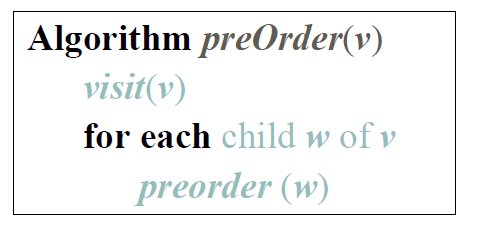


Tree being traversed:
    
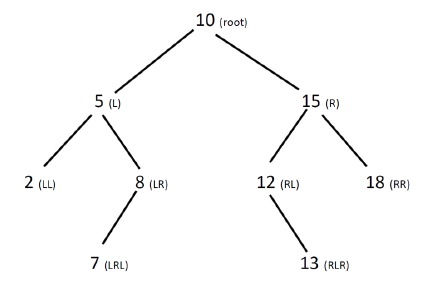    

In [17]:
#-----------------------------------------------------------------
# preorder algorithm (recursive):
#    if tree node is not empty:
#        print the node's element 
#        if the node has a left child call preorder on that node
#        if the node has a right child call preorder on that node
#----------------------------------------------------------------

def preorder (pos):
    if pos is not None:
        print (SLBT.element (pos))           # "visit" or inspect the node element
        if SLBT.left(pos) is not None:    
            preorder (SLBT.left(pos))
        if SLBT.right(pos) is not None:
            preorder (SLBT.right(pos))


In [18]:
preorder (SLBT.root)             # preorder entire tree
#preorder (SLBT.root.right)      # preorder only the right subtree

10
5
2
8
7
15
12
13
18


Tree being traversed:
    
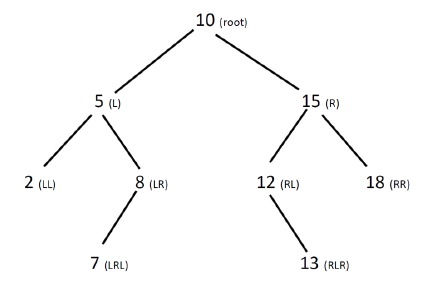    

### Postorder traversal - recursive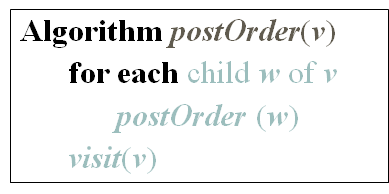

In [19]:
#-----------------------------------------------------------------
# postorder algorithm (recursive):
#    if tree node is not empty:
#        if the node has a left child call preorder on that node
#        if the node has a right child call preorder on that node
#        print the node's element 
#----------------------------------------------------------------

def postorder (pos):
    if pos is not None:
        if SLBT.left(pos) is not None:    
            postorder (SLBT.left(pos))
        if SLBT.right(pos) is not None:
            postorder (SLBT.right(pos))
        print(SLBT.element(pos))            # "visit" or inspect the node element


In [20]:
postorder(SLBT.root)

2
7
8
5
13
12
18
15
10


### Postorder travsersal using a stack - need to include ArrayStack as stack implementation

In [21]:
#---------------------------------------------------------------------------
# ArrayStack class - from Wiley source
# modified by GRS 09/01/2019 for IT-309
#---------------------------------------------------------------------------
class ArrayStack:
  """LIFO Stack implementation using a Python list as underlying storage."""

  def __init__(self):
    """Create an empty stack."""
    self._data = []                       # nonpublic list instance

  def __len__(self):
    """Return the number of elements in the stack."""
    return len(self._data)

  def is_empty(self):
    """Return True if the stack is empty."""
    return len(self._data) == 0

  def push(self, e):
    """Add element e to the top of the stack."""
    self._data.append(e)                  # new item stored at end of list

  def top(self):
    """Return (but do not remove) the element at the top of the stack.
    Raise Empty exception if the stack is empty.
    """
    if self.is_empty():
      raise Empty('Stack is empty')
    return self._data[-1]                 # the last item in the list

  def pop(self):
    """Remove and return the element from the top of the stack (i.e., LIFO).
    Raise Empty exception if the stack is empty.
    """
    if self.is_empty():
      raise Empty('Stack is empty')
    return self._data.pop()               # remove last item from list

  def showStack(self):                    # Added by GRS to display stack contents
    """ Display the contents of the stack top to bottom, without 'pop'. """
    print('\nContents of stack from top to bottom:')
    for s in range(len(self._data) - 1, -1, -1):
      print(self._data[s])
    
class Empty(Exception):
  """Simple 'Empty' exception - used as message pass-through. GRS """
  pass



In [22]:
#--------------------------------------------------------------------
# postorder algorithm:
#     push root
#     if top has children that were not already popped
#          push right child (if any), push left child (if any) 
#     else print top, pop it, add to the already_popped list 
#--------------------------------------------------------------------
S = ArrayStack()
S.push(SLBT.root)
already_popped = [ ]    # nodes that have already been printed ("visited")
while not S.is_empty():
    top = S.top()
    pushed = False
    R_child = SLBT.right(top)
    L_child = SLBT.left(top)
    if R_child is not None and R_child not in already_popped:    
        S.push(R_child)
        pushed = True
    if L_child is not None and L_child not in already_popped:
        S.push(L_child)
        pushed = True
    if not pushed:
        top = S.pop()
        already_popped.append(top)
        print(top.element)            # "visit" or inspect node element
        

2
7
8
5
13
12
18
15
10


Tree being traversed:
    
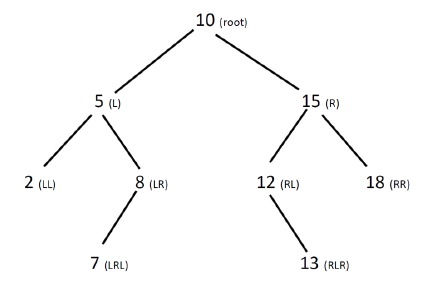    

### Inorder traversal - recursive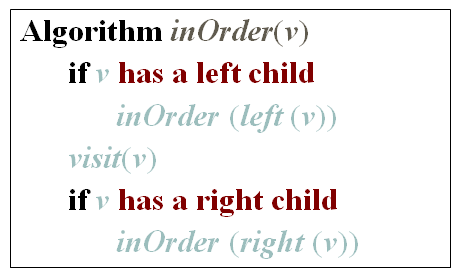

In [23]:
#-----------------------------------------------------------------
# inorder algorithm (recursive):
#    if tree node is not empty:
#        if the node has a left child call preorder on that node
#        print the node's element
#        if the node has a right child call preorder on that node
#----------------------------------------------------------------

def inorder (pos):
    if pos is not None:
        if SLBT.left(pos) is not None:    
            inorder (SLBT.left(pos))
        print(SLBT.element(pos))
        if SLBT.right(pos) is not None:
            inorder (SLBT.right(pos))


In [24]:
inorder(SLBT.root)

2
5
7
8
10
12
13
15
18


### Function to print a parethesized representation of a tree - useful for A5

In [25]:
def parenthesize(T, p):
    """ Print a parenthesized representation of a subtree of T rooted at p. """
    if p is not None:
        print (p.element, end = '')
        if not T.is_leaf(p):
            first_time = True
            for c in (T.left(p), T.right(p)):
                if first_time:
                    sep = ' ('
                else:
                    sep = ', '
                print (sep, end = '')
                first_time = False
                parenthesize(T, c)
            print(')', end = '')

In [26]:
parenthesize(SLBT, SLBT.root)

10 (5 (2, 8 (7, )), 15 (12 (, 13), 18))

In [27]:
# Tree for expression  ((4 + 2) *  6) - (4 + 8)
SLBT1 = SimplifiedLinkedBinaryTree()
root = SLBT1.add_root("-")
L = SLBT1.add_left(root, "*")
R = SLBT1.add_right(root, "+")
LL = SLBT1.add_left(L, "+")
LR = SLBT1.add_right(L, "6")
LLL = SLBT1.add_left(LL, "4")
LLR = SLBT1.add_right(LL, "2")
RL = SLBT1.add_left(R, "4")
RR = SLBT1.add_right(R, "8")
print(len(SLBT1))

9


In [28]:
SLBT = SLBT1
postorder(SLBT1.root)


4
2
+
6
*
4
8
+
-


In [29]:
inorder(SLBT1.root)

4
+
2
*
6
-
4
+
8


In [30]:
def parenthesize(T, p):
    """ Print a parenthesized representation of a subtree of T rooted at p. """
    if p is not None:
        print (p.element, end = '')
        if not T.is_leaf(p):
            first_time = True
            for c in (T.left(p), T.right(p)):
                if first_time:
                    sep = ' ('
                else:
                    sep = ', '
                print (sep, end = '')
                first_time = False
                parenthesize(T, c)
            print(')', end = '')

In [31]:
parenthesize(SLBT1, SLBT1.root)

- (* (+ (4, 2), 6), + (4, 8))

### Print the expression in infix with parentheses - specialization of the inorder traversal algorithm

In [32]:
def printExpression(T, p):
    """ Print an infix representation of the expression of subtree of T rooted at p. """
    if p.left is not None:
        print ("(", end = ' ')
        printExpression(T, p.left)
    print(p.element, end = ' ')
    if p.right is not None:
        printExpression(T, p.right)
        print(")", end = ' ')
       

In [33]:
printExpression(SLBT1, SLBT1.root)

( ( ( 4 + 2 ) * 6 ) - ( 4 + 8 ) ) 

### Process the arithmetic expression ((2 x (5 - 1)) + (3 x 2)) - use code from textbook. Similar to postorder traversal.

In [34]:
def evalExpr (pos):
    if pos is not None:
        if SLBT.is_leaf(pos):
            return SLBT.element(pos)
        else:
            x = int(evalExpr(SLBT.left(pos)))
            y = int(evalExpr(SLBT.right(pos)))
            print ('x = ', x,'  y = ', y, '  pos element = ', SLBT.element(pos))
            if '*' in SLBT.element(pos):
                return x * y
            elif '+' in SLBT.element(pos):
                return x + y
            elif '-' in SLBT.element(pos):
                return x - y
            else: return x / y
        

#### Recreate the tree, but with all numbers and no variable symbols.

In [36]:
SLBT = SimplifiedLinkedBinaryTree()
root = SLBT.add_root(' + ')
SLBT.add_left(root, ' * ')
SLBT.add_right(root, ' * ')
L = SLBT.left(root)
R = SLBT.right(root)
LL = SLBT.add_left(L, 2)
LR = SLBT.add_right(L, ' - ')
LRL = SLBT.add_left(LR, 5)
LRR = SLBT.add_right(LR, 1)
RL = SLBT.add_left(R, 3)
RR = SLBT.add_right(R, 8)

In [38]:
evalExpr(SLBT1.root)

x =  4   y =  2   pos element =  +
x =  6   y =  6   pos element =  *
x =  4   y =  8   pos element =  +
x =  36   y =  12   pos element =  -


24